In [104]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
print("hello")


hello


In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",shuffle = True,
    image_size = (256,256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [15]:
len(dataset)

68

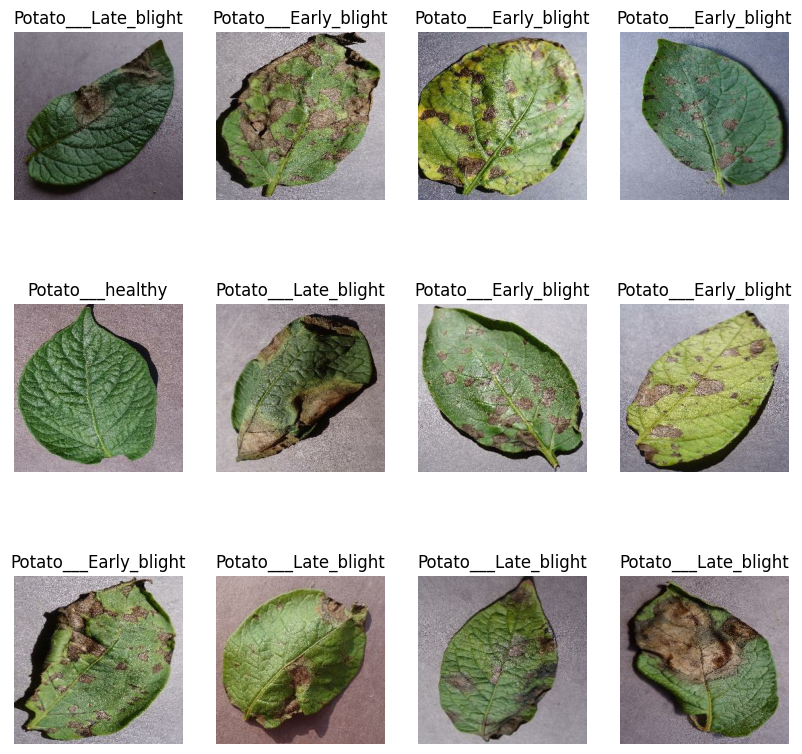

In [33]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [35]:
actual_length = 68*32
actual_length

2176

In [73]:
EPOCHS = 50
BATCH_SIZE = 32
IMAGE_SIZE = 256

In [37]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [38]:
train_ds = dataset.take(54)
len(train_ds)

54

In [40]:
dataset.skip(54)
validation_ds = dataset.take(6)
dataset.skip(6)
test_ds = dataset.take(6)

In [41]:
len(train_ds),len(validation_ds),len(test_ds)

(54, 6, 6)

In [42]:
## Python function for the slicing to make the test ,train and validation datsets
def get_dataset_partitions_tf(ds, train_split =0.8, val_split =0.1,test_split=0.1,shuffle = True, shuffle_size =10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    test_size = int(test_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(val_size).take(test_size)
    
    return train_ds,val_ds,test_ds

In [44]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
len(train_ds),len(validation_ds),len(test_ds)

(54, 6, 6)

In [52]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUT0TUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUT0TUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUT0TUNE)

AttributeError: module 'tensorflow._api.v2.data' has no attribute 'AUT0TUNE'

In [57]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [58]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [77]:
n_classes = 3
CHANNELS =3
input_shape = (BATCH_SIZE ,256,256,CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),   
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape = input_shape)

In [78]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   multiple                  0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [79]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
    metrics = ['accuracy']
)

In [80]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size =BATCH_SIZE,
    verbose =1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 35s 578ms/step - loss: 0.9072 - accuracy: 0.4818 - val_loss: 0.8893 - val_accuracy: 0.6042
Epoch 2/50
54/54 [==============================] - 33s 599ms/step - loss: 0.7519 - accuracy: 0.6325 - val_loss: 0.6571 - val_accuracy: 0.6927
Epoch 3/50
54/54 [==============================] - 33s 593ms/step - loss: 0.4936 - accuracy: 0.7905 - val_loss: 0.2820 - val_accuracy: 0.8698
Epoch 4/50
54/54 [==============================] - 31s 556ms/step - loss: 0.2843 - accuracy: 0.8935 - val_loss: 0.2188 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 31s 555ms/step - loss: 0.2384 - accuracy: 0.9126 - val_loss: 0.2849 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 34s 608ms/step - loss: 0.2162 - accuracy: 0.9173 - val_loss: 0.2330 - val_accuracy: 0.8958
Epoch 7/50
54/54 [==============================] - 38s 685ms/step - loss: 0.2009 - accuracy: 0.9155 - val_loss: 0.2346 - val_accuracy: 0.9010

In [82]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 2s 131ms/step - loss: 0.0898 - accuracy: 0.9635


In [83]:
scores

[0.08975771814584732, 0.9635416865348816]

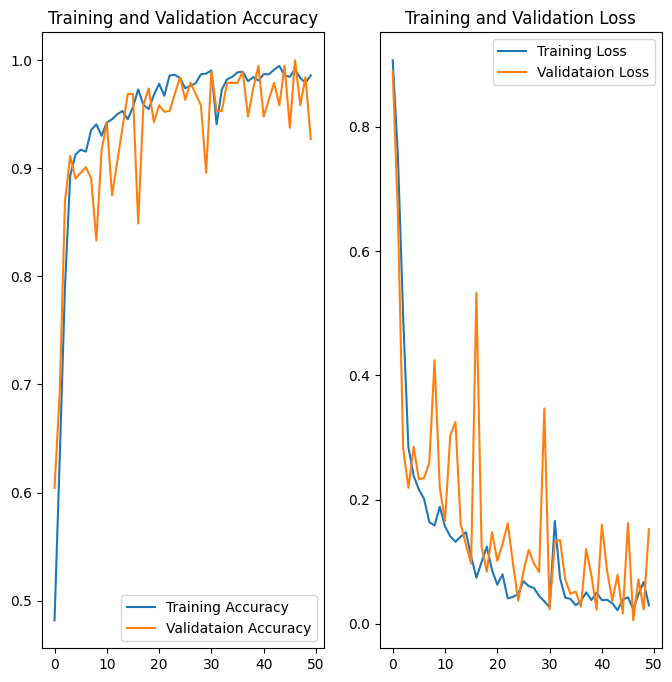

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validataion Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validataion Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image to Predict
The first image actual label is : Potato___Late_blight
1/1 [==============================] - 0s 186ms/step
The predicted label name is : Potato___Late_blight


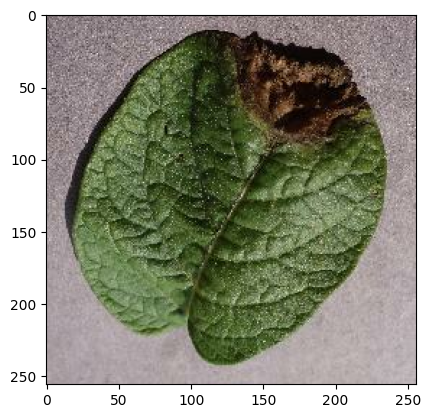

In [108]:
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First Image to Predict")
    plt.imshow(first_image)
    print("The first image actual label is :",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("The predicted label name is :",class_names[np.argmax(batch_prediction[0])])

In [105]:
np.argmax([9.7941474e-06,9.9995053e-01, 3.9683364e-05]) 
## To get te maxium and predict the favourable class 

1

In [118]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) ##Create a Batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 41ms/step


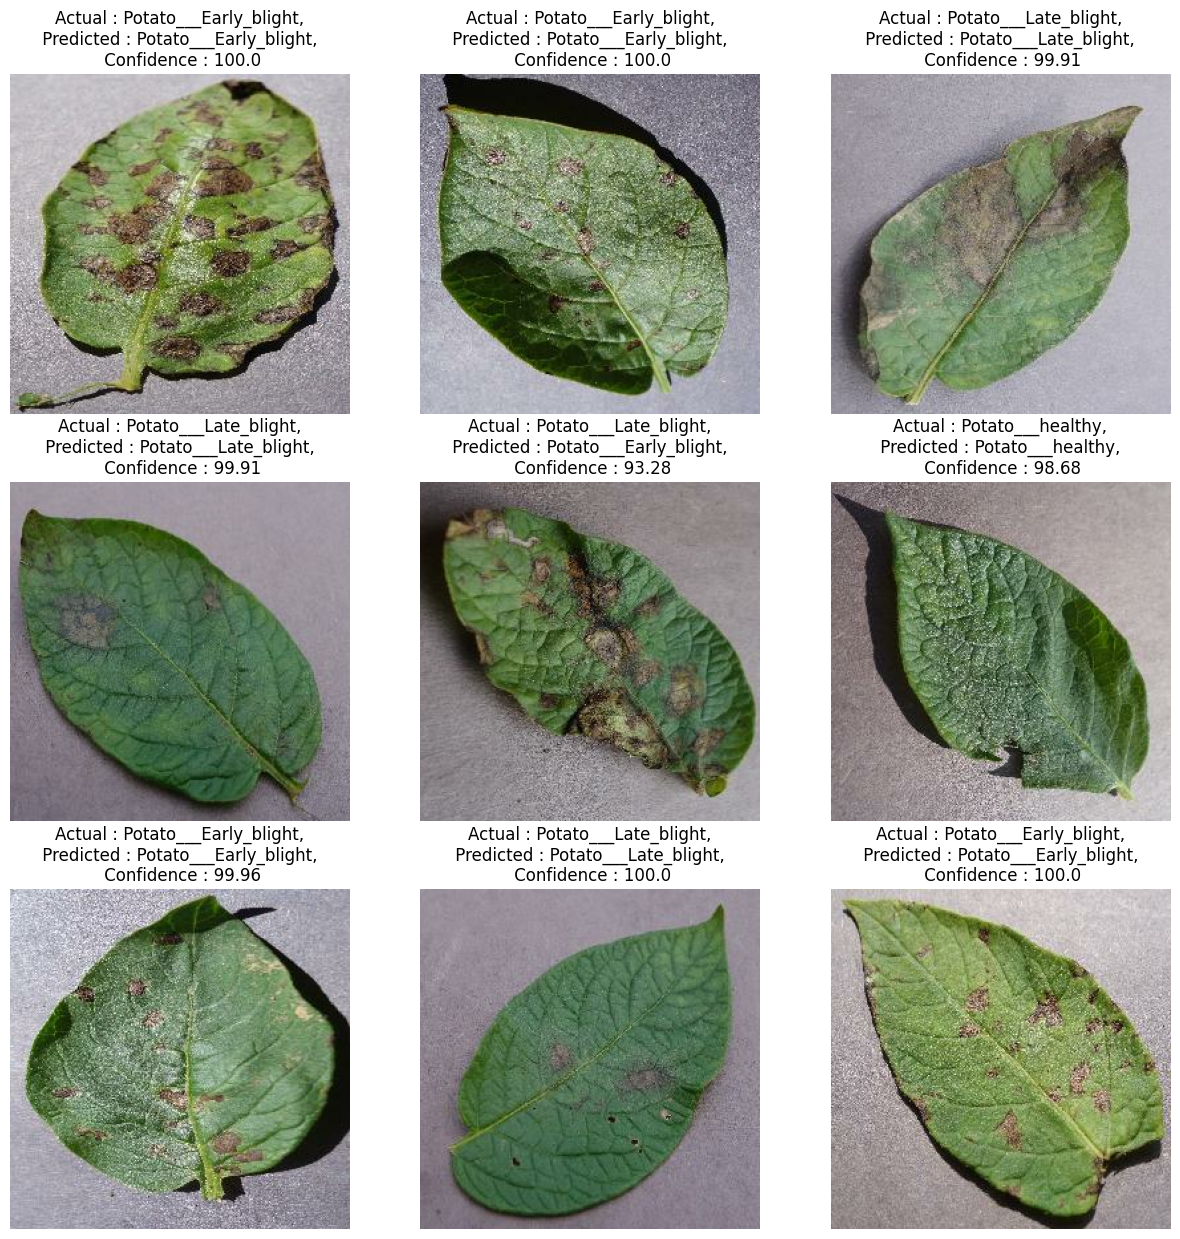

In [122]:
plt.figure(figsize=(15,15))

for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class}, \n Confidence : {confidence}")
        plt.axis("off")

In [123]:
model_version =1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
